# Main Modelling Notebook

In [2]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow.keras import models, layers

import os
import numpy as np
import pandas as pd

from utils.data_load import load_test, load_train
from utils.solution import create_solution

2022-09-23 18:31:04.470065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-23 18:31:07.329144: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-23 18:31:11.513757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-23 18:31:11.513820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

----SUCCESS: LOADED DATASET----


In [3]:
# gpu test
tf.config.list_physical_devices('GPU')

2022-09-23 18:36:13.037180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2022-09-23 18:36:13.812752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-23 18:36:13.812943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Load Data

In [4]:
dm = load_train()

dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
butterfiles 500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processed 100/500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processed 200/500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processed 300/500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processed 400/500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500


libpng warning: iCCP: known incorrect sRGB profile


Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
----SUCCESS: LOADED DATASET----


### 0. Default FIT Model

In [14]:
def build_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), padding='same', activation= 'relu', input_shape=(32,32,3)))
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = build_cnn()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = dm.X_train, y = dm.y_train, validation_data = (dm.X_valid, dm.y_valid), epochs = 15, batch_size = 32)

In [ ]:
# create_solution(model, name="default-trained")

### 01. Assignment Approach

In [6]:
from utils.models import DefaultModel
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
class Model1(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=3,
                 feature_maps=40,
                 num_classes=10, 
                 drop_rate=0.4,
                 batch_norm = True,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size= 32,
                 num_epochs= 20,
                 learning_rate=0.001,
                 verbose = True, 
                 es_patience = 5):
        super(Model1, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
        self.use_skip = use_skip
        self.es_patience = es_patience

    def build_cnn(self):
        """Builds a dynamic CNN based on attributes passed into the class"""
        self.model = models.Model()
        inputs = layers.Input(shape=(self.width, self.height, self.depth))
        h = inputs

        for i in range(self.num_blocks):
            h = self.ResidBlock(h=h, num_channels=self.feature_maps[i])

        h = layers.Flatten()(h)
        h = layers.Dense(units=self.num_classes, activation="softmax")(h)

        self.model = models.Model(inputs=inputs, outputs=h)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def ResidBlock(self, h, num_channels) -> list:
        """Passes input h through a residual block.
        Args:
            h (Matrix): The output of the previous layer
            num_channes (int): The number of channels for our Conv3D layers
        Returns:
            h (Matrix): Output of final.
        """
        h = layers.Conv2D(num_channels, (3,3), padding='same')(h)
        skip_signal = h
        
        if self.batch_norm:
            h = layers.BatchNormalization()(h)   

        h = layers.Activation(self.activation_func)(h)
        h = layers.Conv2D(num_channels, (3,3), padding='same')(h)

        if self.batch_norm:
            h = layers.BatchNormalization()(h)

        if self.use_skip:
            h = skip_signal + h

        h = layers.Activation(self.activation_func)(h)
        h = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(h)
        h = layers.Dropout(rate=self.drop_rate)(h)

        return h
    
    def fit(self, data_manager, batch_size=None, num_epochs=None, es_patience=None):
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        es_patience = self.es_patience if es_patience is None else es_patience
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        early_checkpoint = EarlyStopping(patience=es_patience, monitor='val_accuracy', mode='max')
        callbacks = [early_checkpoint]

        if self.is_augmentation:
            datagen = ImageDataGenerator(
                rotation_range = 30,
                fill_mode = "nearest",
                horizontal_flip=True, 
                width_shift_range=0.2, 
                height_shift_range=0.2,
                brightness_range=[0.4,1.2],
                zoom_range = 0.2)

            datagen.fit(data_manager.X_train)
            flow = datagen.flow(x=data_manager.X_train, y=data_manager.y_train, batch_size=batch_size)
            X_train_aug = flow.x
            y_train_aug = flow.y
            
            self.history = self.model.fit(x = X_train_aug, y = y_train_aug, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                epochs = num_epochs, batch_size = batch_size, verbose= self.verbose, callbacks=callbacks)

        else:
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                epochs = num_epochs, batch_size = batch_size, verbose= self.verbose, callbacks=callbacks)

In [54]:
bm1 = Model1(is_augmentation=True)
bm1.build_cnn()
bm1.summary()

Model: "model_311"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_156 (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_966 (Conv2D)            (None, 32, 32, 40)   1120        ['input_156[0][0]']              
                                                                                                  
 batch_normalization_966 (Batch  (None, 32, 32, 40)  160         ['conv2d_966[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_966 (Activation)    (None, 32, 32, 40)   0           ['batch_normalization_966

In [55]:
bm1.fit(dm, batch_size=32, num_epochs=20)

Epoch 1/20
125/125 [==============================] - 2s 8ms/step - loss: 2.0534 - accuracy: 0.2735 - val_loss: 2.3468 - val_accuracy: 0.1680
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 1.6350 - accuracy: 0.4342 - val_loss: 2.4141 - val_accuracy: 0.1840
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.4574 - accuracy: 0.4925 - val_loss: 1.9466 - val_accuracy: 0.3380
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2959 - accuracy: 0.5515 - val_loss: 1.7378 - val_accuracy: 0.4200
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1777 - accuracy: 0.5838 - val_loss: 1.3623 - val_accuracy: 0.5260
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0618 - accuracy: 0.6390 - val_loss: 1.3118 - val_accuracy: 0.5700
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 0.9821 - accuracy: 0.6665 - val_loss: 1.1386 - val_accuracy: 0.6140
Epoch 

In [56]:
bm1.compute_accuracy(dm.X_test, dm.y_test, batch_size=32)

16/16 [==============================] - 0s 2ms/step - loss: 1.1289 - accuracy: 0.6460


0.6460000276565552

In [21]:
create_solution(bm1.model, name="bm1")

722/722 [==============================] - 9s 12ms/step


### 2. Grid Search Model1

In [57]:
from itertools import product


def grid_search_kwargs(grid, obj_class, verbose=True):
    """Self Implemented Grid Search"""
    all_results = []
    for pv in list(product(*grid.values())):
        results = {}
        params = {k:p for p, k in zip(pv, list(grid.keys()))}

        if verbose:
            print(f"INFO | Fitting Model w params: {params}")

        mod = obj_class(**params)
        mod.build_cnn()
        mod.fit(dm)

        if verbose:
            print(f"SUCCESS | Model Fitted")

        results.update(params)

        results['val_accuracy'] = mod.history.history['val_accuracy'][-1]
        results['train_accuracy'] = mod.history.history['accuracy'][-1]
        results['test_accuracy'] = mod.compute_accuracy(dm.X_test, dm.y_test)

        all_results.append(results)


    df = pd.DataFrame(all_results).sort_values('test_accuracy', ascending=False).reset_index()
    print("Best Params:")
    print(df.loc[0])

    return df


grid = {
    "is_augmentation": [True, False],
    "drop_rate": [0.2, 0.3, 0.4],
    "es_patience": [5],
    "feature_maps": [32, 40],
    "num_epochs": [25, 35],
    "verbose": [False]
}

res = grid_search_kwargs(grid, Model1)
res

INFO | Fitting Model w params: {'is_augmentation': True, 'drop_rate': 0.2, 'es_patience': 5, 'feature_maps': 32, 'num_epochs': 25, 'verbose': False}
SUCCESS | Model Fitted
8/8 [==============================] - 0s 2ms/step - loss: 1.3779 - accuracy: 0.6000
INFO | Fitting Model w params: {'is_augmentation': True, 'drop_rate': 0.2, 'es_patience': 5, 'feature_maps': 32, 'num_epochs': 35, 'verbose': False}
SUCCESS | Model Fitted
8/8 [==============================] - 0s 2ms/step - loss: 1.5881 - accuracy: 0.6340
INFO | Fitting Model w params: {'is_augmentation': True, 'drop_rate': 0.2, 'es_patience': 5, 'feature_maps': 40, 'num_epochs': 25, 'verbose': False}
SUCCESS | Model Fitted
8/8 [==============================] - 0s 2ms/step - loss: 1.4261 - accuracy: 0.6200
INFO | Fitting Model w params: {'is_augmentation': True, 'drop_rate': 0.2, 'es_patience': 5, 'feature_maps': 40, 'num_epochs': 35, 'verbose': False}
SUCCESS | Model Fitted
8/8 [==============================] - 0s 3ms/step - loss

,index,is_augmentation,drop_rate,es_patience,feature_maps,num_epochs,verbose,val_accuracy,train_accuracy,test_accuracy
0,20,False,0.4,5,32,25,False,0.694,0.85375,0.684
1,7,True,0.3,5,40,35,False,0.702,0.95250,0.672
2,10,True,0.4,5,40,25,False,0.718,0.83900,0.668
3,21,False,0.4,5,32,35,False,0.710,0.88675,0.660
4,3,True,0.2,5,40,35,False,0.652,0.97975,0.660
5,6,True,0.3,5,40,25,False,0.686,0.93875,0.660
6,11,True,0.4,5,40,35,False,0.706,0.89350,0.660
7,16,False,0.3,5,32,25,False,0.674,0.91725,0.654
8,23,False,0.4,5,40,35,False,0.690,0.90375,0.652
9,5,True,0.3,5,32,35,False,0.664,0.82875,0.652


In [11]:
res1 = res.copy()
res1.to_csv('grid1.csv')

In [32]:
res2 = res.copy()
res2.to_csv('grid2.csv')

In [58]:
res3 = res.copy()
res3.to_csv('grid3.csv')

In [14]:
import seaborn as sns

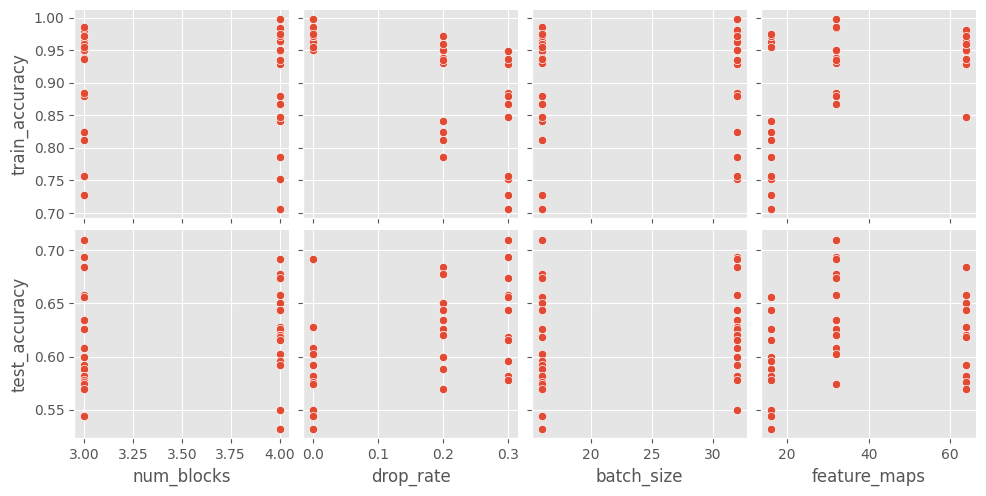

In [20]:
sns.pairplot(
    res1,
    x_vars=['num_blocks','drop_rate','batch_size','feature_maps'],
    y_vars=['train_accuracy', 'test_accuracy']
)

- feature maps 32 - 48 look good, try 32,40,48
- batch size hard to differentiate, keep 16, 32
- higher drop rate tends to be better, try 0.25, 0.3, 0.4
- num blocks 3 seems to be superior

In [34]:
res2.keys()

Index(['index', 'num_blocks', 'is_augmentation', 'drop_rate', 'batch_size',
       'es_patience', 'feature_maps', 'num_epochs', 'learning_rate', 'verbose',
       'val_accuracy', 'train_accuracy', 'test_accuracy'],
      dtype='object')

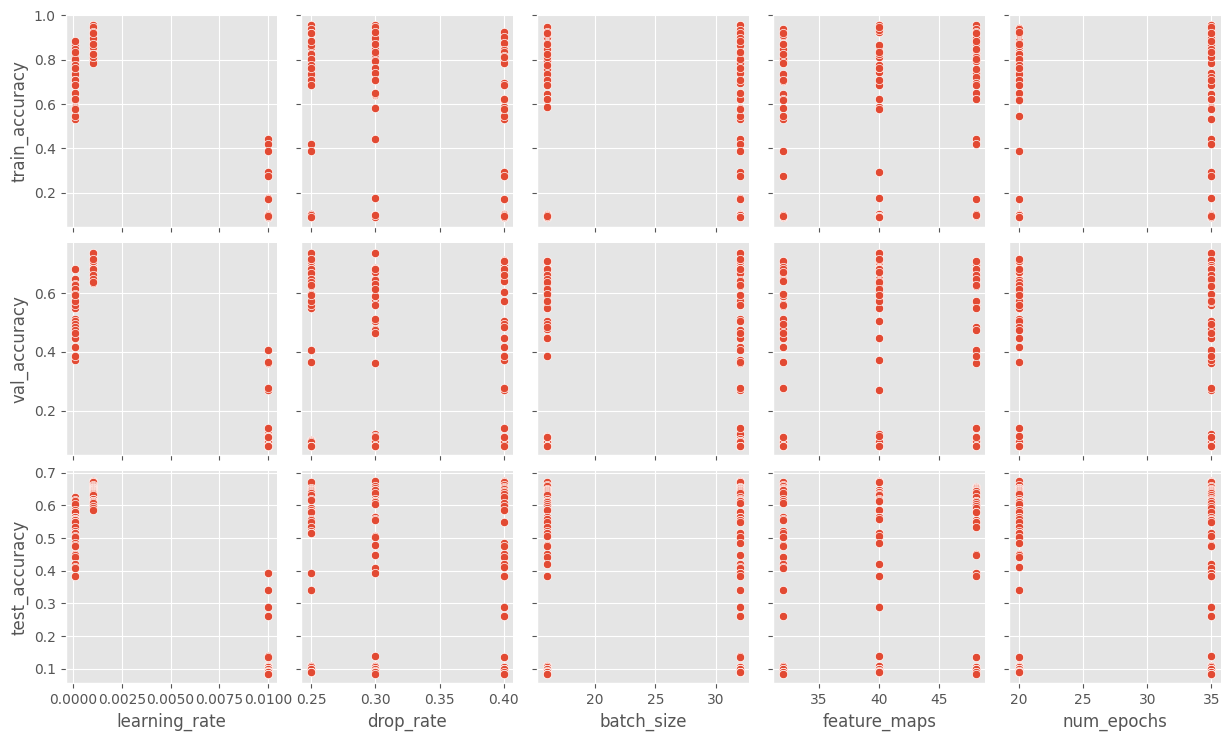

In [35]:
sns.pairplot(
    res2,
    x_vars=['learning_rate','drop_rate','batch_size','feature_maps', 'num_epochs'],
    y_vars=['train_accuracy', 'val_accuracy', 'test_accuracy']
)

- learning rate = 0.001 dominant
- feature maps = 40
- batch size = 32
- drop rate = 0.4, 0.3
- num epochs hard to say

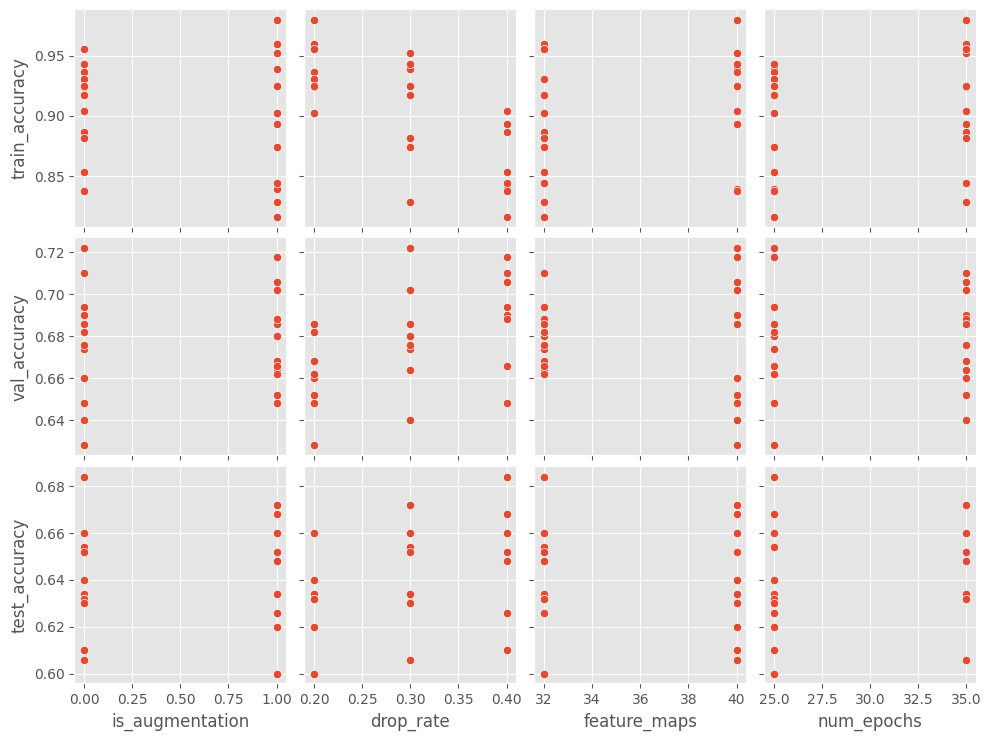

In [60]:
sns.pairplot(
    res3,
    x_vars=['is_augmentation','drop_rate','feature_maps', 'num_epochs'],
    y_vars=['train_accuracy', 'val_accuracy', 'test_accuracy']
)

In [61]:
res3.head(20)

,index,is_augmentation,drop_rate,es_patience,feature_maps,num_epochs,verbose,val_accuracy,train_accuracy,test_accuracy
0,20,False,0.4,5,32,25,False,0.694,0.85375,0.684
1,7,True,0.3,5,40,35,False,0.702,0.95250,0.672
2,10,True,0.4,5,40,25,False,0.718,0.83900,0.668
3,21,False,0.4,5,32,35,False,0.710,0.88675,0.660
4,3,True,0.2,5,40,35,False,0.652,0.97975,0.660
5,6,True,0.3,5,40,25,False,0.686,0.93875,0.660
6,11,True,0.4,5,40,35,False,0.706,0.89350,0.660
7,16,False,0.3,5,32,25,False,0.674,0.91725,0.654
8,23,False,0.4,5,40,35,False,0.690,0.90375,0.652
9,5,True,0.3,5,32,35,False,0.664,0.82875,0.652


### 2.1 Grid Search Models

In [27]:
gs1 = Model1(drop_rate=0.3, batch_size=16, es_patience=5, num_epochs=35)
gs1.build_cnn()
gs1.fit(dm)
gs1.compute_accuracy(dm.X_test, dm.y_test)

Epoch 1/35
250/250 [==============================] - 2s 6ms/step - loss: 1.9997 - accuracy: 0.3020 - val_loss: 2.2854 - val_accuracy: 0.2180
Epoch 2/35
250/250 [==============================] - 1s 6ms/step - loss: 1.6284 - accuracy: 0.4257 - val_loss: 1.6872 - val_accuracy: 0.3940
Epoch 3/35
250/250 [==============================] - 1s 6ms/step - loss: 1.4515 - accuracy: 0.4938 - val_loss: 1.2471 - val_accuracy: 0.5820
Epoch 4/35
250/250 [==============================] - 1s 5ms/step - loss: 1.3221 - accuracy: 0.5447 - val_loss: 1.3727 - val_accuracy: 0.5400
Epoch 5/35
250/250 [==============================] - 1s 6ms/step - loss: 1.1686 - accuracy: 0.6028 - val_loss: 1.2380 - val_accuracy: 0.5920
Epoch 6/35
250/250 [==============================] - 1s 6ms/step - loss: 1.0939 - accuracy: 0.6202 - val_loss: 1.2514 - val_accuracy: 0.5780
Epoch 7/35
250/250 [==============================] - 1s 6ms/step - loss: 0.9715 - accuracy: 0.6747 - val_loss: 1.2937 - val_accuracy: 0.6140
Epoch 

0.6819999814033508

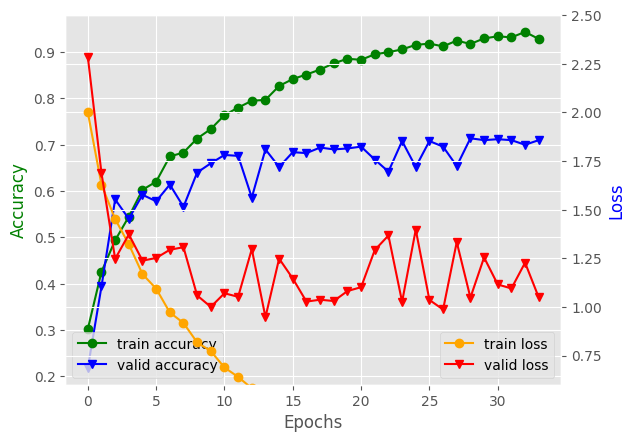

In [28]:
gs1.plot_progress()

In [29]:
create_solution(gs1.model, "grid-search-1")

722/722 [==============================] - 1s 2ms/step


In [38]:
gs2 = Model1(drop_rate=0.4, batch_size=32, es_patience=5, num_epochs=20, feature_maps=40)
gs2.build_cnn()
gs2.fit(dm)
gs2.compute_accuracy(dm.X_test, dm.y_test)

Epoch 1/20
125/125 [==============================] - 2s 8ms/step - loss: 2.0251 - accuracy: 0.3035 - val_loss: 2.6524 - val_accuracy: 0.1580
Epoch 2/20
125/125 [==============================] - 1s 7ms/step - loss: 1.6584 - accuracy: 0.4223 - val_loss: 2.3800 - val_accuracy: 0.1780
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.4868 - accuracy: 0.4760 - val_loss: 1.8832 - val_accuracy: 0.3440
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.3408 - accuracy: 0.5318 - val_loss: 1.5250 - val_accuracy: 0.4760
Epoch 5/20
125/125 [==============================] - 1s 7ms/step - loss: 1.2058 - accuracy: 0.5840 - val_loss: 1.4462 - val_accuracy: 0.5080
Epoch 6/20
125/125 [==============================] - 1s 7ms/step - loss: 1.1206 - accuracy: 0.6170 - val_loss: 1.2811 - val_accuracy: 0.5620
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0070 - accuracy: 0.6562 - val_loss: 1.4310 - val_accuracy: 0.5600
Epoch 

0.6740000247955322

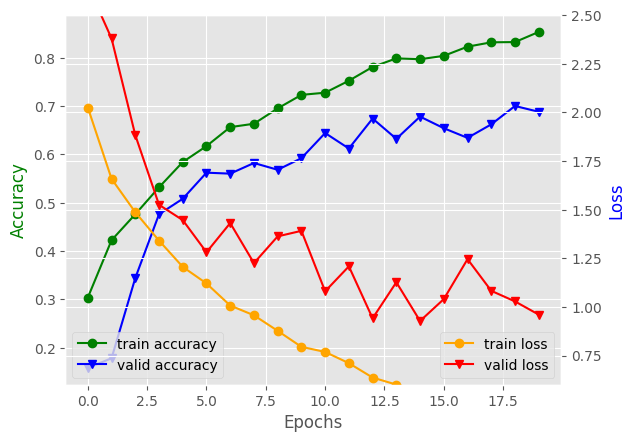

In [40]:
gs2.plot_progress()

In [39]:
create_solution(gs2.model, "grid-search-2")

722/722 [==============================] - 1s 2ms/step


In [62]:
res3.head()

,index,is_augmentation,drop_rate,es_patience,feature_maps,num_epochs,verbose,val_accuracy,train_accuracy,test_accuracy
0,20,False,0.4,5,32,25,False,0.694,0.85375,0.684
1,7,True,0.3,5,40,35,False,0.702,0.95250,0.672
2,10,True,0.4,5,40,25,False,0.718,0.83900,0.668
3,21,False,0.4,5,32,35,False,0.710,0.88675,0.660
4,3,True,0.2,5,40,35,False,0.652,0.97975,0.660


In [64]:
gs3 = Model1(drop_rate=0.3, es_patience=5, num_epochs=35, feature_maps=40, is_augmentation=True)
gs3.build_cnn()
gs3.fit(dm)
gs3.compute_accuracy(dm.X_test, dm.y_test)

Epoch 1/35
125/125 [==============================] - 1s 7ms/step - loss: 1.9752 - accuracy: 0.3165 - val_loss: 2.6835 - val_accuracy: 0.1120
Epoch 2/35
125/125 [==============================] - 1s 6ms/step - loss: 1.5935 - accuracy: 0.4470 - val_loss: 2.2568 - val_accuracy: 0.2140
Epoch 3/35
125/125 [==============================] - 1s 6ms/step - loss: 1.3943 - accuracy: 0.5140 - val_loss: 2.2485 - val_accuracy: 0.3440
Epoch 4/35
125/125 [==============================] - 1s 6ms/step - loss: 1.2484 - accuracy: 0.5720 - val_loss: 1.3780 - val_accuracy: 0.5160
Epoch 5/35
125/125 [==============================] - 1s 6ms/step - loss: 1.1004 - accuracy: 0.6125 - val_loss: 1.5367 - val_accuracy: 0.4840
Epoch 6/35
125/125 [==============================] - 1s 6ms/step - loss: 0.9981 - accuracy: 0.6505 - val_loss: 1.2025 - val_accuracy: 0.6140
Epoch 7/35
125/125 [==============================] - 1s 6ms/step - loss: 0.8860 - accuracy: 0.6920 - val_loss: 1.1367 - val_accuracy: 0.6480
Epoch 

0.671999990940094

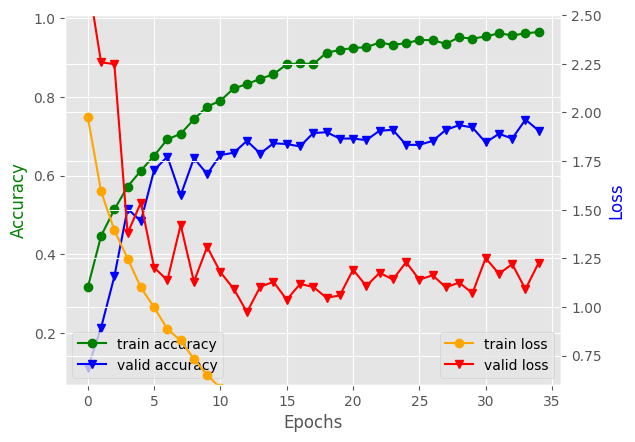

In [65]:
gs3.plot_progress()

In [66]:
gs4 = Model1(drop_rate=0.4, es_patience=5, num_epochs=25, feature_maps=40, is_augmentation=True)
gs4.build_cnn()
gs4.fit(dm)
gs4.compute_accuracy(dm.X_test, dm.y_test)

Epoch 1/25
125/125 [==============================] - 1s 7ms/step - loss: 2.0665 - accuracy: 0.2745 - val_loss: 2.9711 - val_accuracy: 0.1460
Epoch 2/25
125/125 [==============================] - 1s 6ms/step - loss: 1.6597 - accuracy: 0.4160 - val_loss: 2.5056 - val_accuracy: 0.1720
Epoch 3/25
125/125 [==============================] - 1s 6ms/step - loss: 1.4558 - accuracy: 0.5025 - val_loss: 3.1212 - val_accuracy: 0.2420
Epoch 4/25
125/125 [==============================] - 1s 6ms/step - loss: 1.3244 - accuracy: 0.5447 - val_loss: 2.1996 - val_accuracy: 0.3600
Epoch 5/25
125/125 [==============================] - 1s 6ms/step - loss: 1.2090 - accuracy: 0.5828 - val_loss: 1.5883 - val_accuracy: 0.4780
Epoch 6/25
125/125 [==============================] - 1s 6ms/step - loss: 1.1009 - accuracy: 0.6250 - val_loss: 1.3054 - val_accuracy: 0.5780
Epoch 7/25
125/125 [==============================] - 1s 6ms/step - loss: 1.0204 - accuracy: 0.6442 - val_loss: 1.2879 - val_accuracy: 0.5840
Epoch 

0.6520000100135803

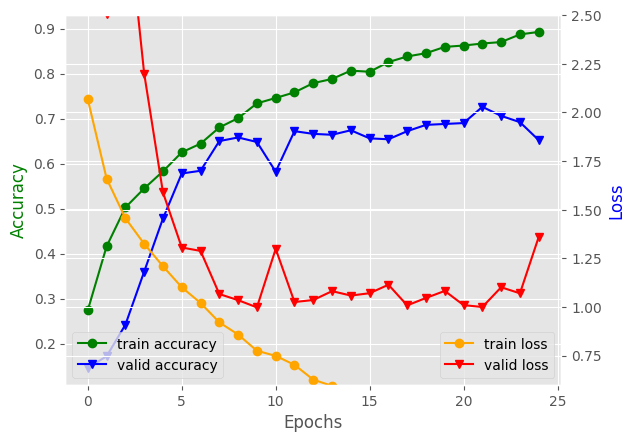

In [67]:
gs4.plot_progress()

In [68]:
create_solution(gs3.model, 'grid-search3')

722/722 [==============================] - 2s 2ms/step


In [70]:
create_solution(gs4.model, 'grid-search4')

722/722 [==============================] - 2s 3ms/step
